# Лабораторная работа №5
# Проведение A/B тестирования

**Цель работы: изучить алгоритмы для проведения A/B тестирования для принятия решений**

### Часть 1

В начале, были импортированы нужные библиотеки, а также были импортированы нужные наборы данных для выполнения первой части задания

In [84]:
import pandas as pd
import numpy as np 
from pandas import DataFrame
import seaborn as sns
import scipy
import math as mth
import matplotlib.pyplot as plt
import sys
np.set_printoptions(threshold=sys.maxsize)
pd.options.display.max_rows = 4000
%matplotlib inline
df_orders = pd.read_csv('orders.csv')
df_orders = df_orders.drop_duplicates()

df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 56.1+ KB


In [85]:
df_orders = df_orders.dropna(subset=["transactionId","visitorId","date","revenue","group"])
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 56.1+ KB


In [106]:
df_visitors = pd.read_csv("visitors.csv")
df_visitors = df_visitors.drop_duplicates()
df_visitors = df_visitors.dropna(subset=["date","group","visitors"])
df_visitors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.9+ KB


Далее, был создан датафрейм, который содержит информацию только о датах и группе для последующего сбора инофрмации по посетителям и по заказам.

In [71]:
datesGroups = df_orders[['date','group']].drop_duplicates()

В datesAggregated и visitorsAggregated содержится аггрегированная инофрмация по заказам и по посетителям соответственно. Суммируется инофрмация по количеству заявок, посетителей, доход.

In [72]:
datesAggregated = datesGroups.apply(lambda x: df_orders[np.logical_and(df_orders['date'] <= x['date'], df_orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}),
axis=1).sort_values(by=['date','group'])
datesAggregated = datesAggregated.rename(columns={'transactionId':'orders','visitorID':'buyers'})

In [7]:
visitorsAggregated = datesGroups.apply(
    lambda x: df_visitors[np.logical_and(df_visitors['date'] <= x['date'], 
            df_visitors['group'] == x['group'])].agg({'date' : 'max', 
            'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])


В итоге, полученные значения можно объединить с полученными ранее датами и группами, и получить итоговую таблицу с нужной информацией.

In [73]:
result = pd.concat([datesAggregated,visitorsAggregated['visitors']], axis=1)
result

,date,group,orders,visitorId,revenue,visitors
55,2019-08-01,A,24,20,148579,719
66,2019-08-01,B,21,20,101217,713
175,2019-08-02,A,44,38,242401,1338
173,2019-08-02,B,45,43,266748,1294
291,2019-08-03,A,68,62,354874,1845
310,2019-08-03,B,61,59,380996,1803
499,2019-08-04,A,84,77,425699,2562
498,2019-08-04,B,78,75,489567,2573
698,2019-08-05,A,109,100,549917,3318
699,2019-08-05,B,101,98,581995,3280


Далее, так как в полученной информации имеется две группы, разделим информацию на два датасета: для группы A и B.

In [9]:
cumulativeRevenueA = result[result['group'] == 'A']
cumulativeRevenueA

,date,group,orders,visitorId,revenue,visitors
55,2019-08-01,A,24,20,148579,719
175,2019-08-02,A,44,38,242401,1338
291,2019-08-03,A,68,62,354874,1845
499,2019-08-04,A,84,77,425699,2562
698,2019-08-05,A,109,100,549917,3318
362,2019-08-06,A,127,114,598401,3985
580,2019-08-07,A,145,131,740818,4629
835,2019-08-08,A,161,146,837097,5239
569,2019-08-09,A,177,159,1025603,5856
859,2019-08-10,A,193,175,1236098,6262


In [10]:
cumulativeRevenueB = result[result['group'] == 'B']
cumulativeRevenueB

,date,group,orders,visitorId,revenue,visitors
66,2019-08-01,B,21,20,101217,713
173,2019-08-02,B,45,43,266748,1294
310,2019-08-03,B,61,59,380996,1803
498,2019-08-04,B,78,75,489567,2573
699,2019-08-05,B,101,98,581995,3280
360,2019-08-06,B,129,123,824337,3935
581,2019-08-07,B,153,146,1049671,4644
789,2019-08-08,B,180,171,1270589,5298
567,2019-08-09,B,205,193,1431401,5908
794,2019-08-10,B,228,215,1539203,6277


Далее, построим графики конверсии для обоих групп. Для этого, найдем значения конверсии для обоих групп, и построим график зависимости конверсии от даты.

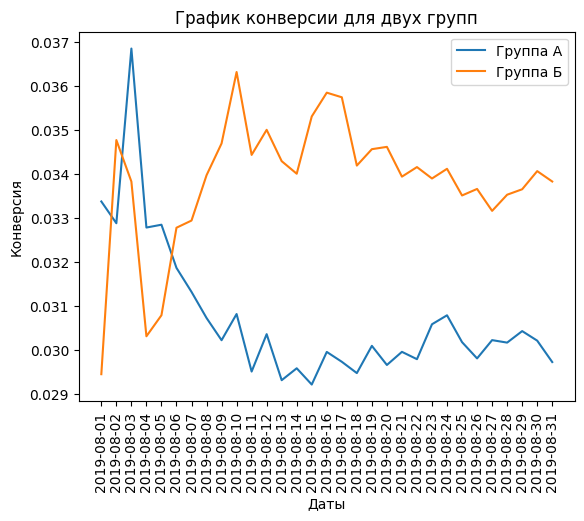

In [104]:
dates_A = cumulativeRevenueA['date']
conversion_A =  cumulativeRevenueA['orders']/cumulativeRevenueA['visitors']
dates_B = cumulativeRevenueB['date']
conversion_B =  cumulativeRevenueB['orders']/cumulativeRevenueB['visitors']
plt.plot(dates_A, conversion_A)
plt.plot(dates_B, conversion_B)
plt.xticks(rotation=90)
plt.title("График конверсии для двух групп")
plt.xlabel("Даты")
plt.ylabel("Конверсия")
plt.legend(("Группа А","Группа Б"))
plt.show()

В итоге, можно сделать **выводы по первой части работы**.

По графику конверсии можно сделать много различных выводов.

Так, можно увидеть, что у обоих групп имеется примерно одно и то же время резкого роста и падени конверсии, причем пик у группы A значительно выше, чем у группы Б. Далее, примерно в то же время идет резкое падение у обоих групп, после чего, идет существенное различие в поведении конверсии с течением времени.

Так, группа А, после пика и резкого падения, далее более плавно падает, и колеблется на уровне 0.030. Однако группа Б напротив, после резкого падения начинает также резко идти вверх, причем пик почти сравнивается с пиком группы А, значительно превышая свой прошый пик. После чего, наблюдается еще два пика меньше. Но в целом, группа Б имеет гораздо большую конверсию, в среднем находясь на уровне 0.035.

Таким образом, видно, что две группы имеют большие различия в уровне конверсии, онако они в период с 1 августа по 5 августа вели себя в целом схожим образом, однако после 5 августа начались расхождения в показаниях. Поэтому, разделение на разные группы позволит отдельно исследовать причины появления таких показателей отдельно для каждой из групп. 

### Часть 2

Далее, были изучен набор данных, посвященный определенным операциям при разных событиях. Датасет содержит название события, ID устройства, временная метка события и номер эксперимента соответственно. Далее импортируются данные, и удаляются ненужные дубликаты.

In [19]:
df_logs_exp = pd.read_csv('logs_exp.csv', delimiter = "\t")
df_logs_exp = df_logs_exp.drop_duplicates()

df_logs_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       243713 non-null  object
 1   DeviceIDHash    243713 non-null  int64 
 2   EventTimestamp  243713 non-null  int64 
 3   ExpId           243713 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 9.3+ MB


Далее, можно сгруппировать значения по событиям, и посмотреть количество записей для каждого из событий, что видно ниже

In [32]:
df = df_logs_exp.groupby("EventName").count()
df.sort_values("ExpId", ascending = False)

,DeviceIDHash,EventTimestamp,ExpId
EventName,,,
MainScreenAppear,119101,119101,119101
OffersScreenAppear,46808,46808,46808
CartScreenAppear,42668,42668,42668
PaymentScreenSuccessful,34118,34118,34118
Tutorial,1018,1018,1018


В итоге видно, что обучающих записей крайне мало, по сравнению с остальными, причем записей события с главным экраном намного больше, чем у остальных событий.

Кроме этого, можно посмотреть количество уникальных пользователей для событий, что видно ниже.

In [36]:
df = df_logs_exp.groupby("EventName")["DeviceIDHash"].nunique()
df

EventName
CartScreenAppear           3749
MainScreenAppear           7439
OffersScreenAppear         4613
PaymentScreenSuccessful    3547
Tutorial                    847
Name: DeviceIDHash, dtype: int64

Количество уникальных пользователей значительно меньше, чем записей в целом (например, для событий с главным экраном пользователей в 16 раз меньше. чем записей. Однако, в данном событии пользователей все еще больше, чем в других. Однако, можно обратить внимание, что уникальных пользователей в обучении не сильно отличается от количества самих событий (из 1000 записей уникальных пользователей - 847). Поэтому, можно сделать вывод, что обучением пользуются не очень часто, часто только один раз.

Наконец, можно провести на основе групп тесты A/A и A/B. Данные тесты можно сделать при помощи одной функции - test_groups, представленной ниже

In [101]:
def test_groups(group_a, group_b, event, alpha):
     #получим количество успехов
    group_users = np.array([df_logs_exp.query('EventName == @event and ExpId == @group_a').DeviceIDHash.nunique(),

    df_logs_exp.query('EventName == @event and ExpId == @group_b').DeviceIDHash.nunique()])
     #получим количество пользователей в группах
    total_users = np.array([df_logs_exp.query('ExpId == @group_a').DeviceIDHash.nunique(), 
                            df_logs_exp.query('ExpId == @group_b').DeviceIDHash.nunique()])
     # пропорция успехов в первой группе:
    p1 = group_users[0]/total_users[0]
     # пропорция успехов во второй группе:
    p2 = group_users[1]/total_users[1]
     # пропорция успехов в комбинированном датасете:
    p_combined = (group_users[0] + group_users[1]) / (total_users[0] + total_users[1])
     # разница пропорций в датасетах
    difference = p1 - p2
     # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt( p_combined * (1 - p_combined) * (1 /total_users[0] + 1 / total_users[1]) )
     # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = scipy.stats.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p-значение: ', p_value)
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: есть значимая разница между долями')
    else:
        print( 'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')


Для начала, проведем А/А тест для групп 246 и 247 для каждого из событий

In [98]:
events = df_logs_exp['EventName'].unique()
events

for i in events:
    print("Для события: " + i)
    test_groups(246, 247,i, 0.05)
    print('')
#test_groups(246, 247,"Tutorial", 0.05)

Для события: MainScreenAppear
p-значение:  0.5856639791209877
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события: PaymentScreenSuccessful
p-значение:  0.10902546202332886
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события: CartScreenAppear
p-значение:  0.19817540651836918
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события: OffersScreenAppear
p-значение:  0.3233225048227193
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события: Tutorial
p-значение:  0.8756574258016974
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



По результатам А/A теста можно сделать несколько выводов. Во-первых, нулевая гипотеза была подтверждена для каждого из событий, что говорит о том, что группы 246 и 247 не имеют больших различий. Так как это именно тест А/А тест, то полученные тут показатели позволят определить: насколько корректным будет A/B тест.

Несмотря на то, что тест прошли все группы, можно увидеть, что p-значение для экрана оплаты (PaymentScreenSuccessful) крайне мало и близко к пороговому. Так как группы 246 и 247 все еще не являются эксперементальными, а являются контрольными, последующий A/B тест с данными группами может показать некорректный результат.

Аналогичная ситуация обстоит с событием CartScreenAppear, но шанс неверного результата меньше, чем в прошлом случае. В целом, наиболее точные результаты, как ни странно, будут в выборке Tuturial, связанным с обучением, и с главным экраном т.к. полученинные значения p наибольшие. 

Аналогичным образом высчитываются значениия для A/B теста

In [99]:
events = df_logs_exp['EventName'].unique()
events

for i in events:
    print("Для события: " + i)
    test_groups(246, 248,i, 0.05)
    print('')

Для события: MainScreenAppear
p-значение:  0.39774960182882513
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события: PaymentScreenSuccessful
p-значение:  0.23403912852637143
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события: CartScreenAppear
p-значение:  0.10534150642722295
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события: OffersScreenAppear
p-значение:  0.2531656758489338
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события: Tutorial
p-значение:  0.8962914725257976
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Таким образом видно, что для всех событий можно принять нулевую гипотезу, а значит, указанные выборки можно считать схожими. 

Исходя из выводов по A/A тесту необходимо обратить внимание на события CartScreenAppear и PaymentScreenSuccessful. Так как ранее, у данных событий было маленькое значение р, полученный сейчас результат, по итогу, может быть ошибочным. Событие Tutorial также, как и в A/A тесте имеет высокое p-значение, а значит, версии данного события для двух групп имеют очень мало различий. Для остальных событий значенния p меньше 0.5, но все равно они имеют недостаточно различий, чтобы однозначно можно было бы сказать, что они разные.

## Выводы
В результате, можно сделать несколько выводов по проделанной работе.

Для сравнения двух групп можно использовать различные методы. Например, для каждой из групп можно собрать различные характеристики, постпоить графики для каждой группы, сравнить их друг с другом, и пронаблюдать как они ведут себя относительно друг друга. Так, в ходе работы, для двух групп, был построен график конверсии, и было отмечено, что если в начале, графики вели себя одинаково, то далее, они стали вести совершенно по-разному, причем они стали получать разные значенния с течением времени. Вторая группа, в средем, имела значения коверсии на 0.05 больше, чем первая группа, а значит, данные группы являются различными.

Другим способом является проведения A/B теста. Данный тест не полагается на анализ отдельных параметров или графиков, при помощи различных методов (Метод Бонферрони, метод Холма, Шидака, и т.д.) получать численные значения и интерпретировать их для исследуемых групп. Как правило, в качестве нулевой гипотезы принимается факт, что выбранные группы не различаются.
Данный метод является более эффективным, так как в данном случае получается готовое число, которое можно сравнить с пороговым значением и принять нулевую гипотезу или опровергнуть ее.

Однако, перед проведением A/B теста лучше проводить A/A тест так как часто выбранные для A/A теста группы могут не подходить для проведения теста. А/А, сравнивая исходные выборки, позволяет заранее определить: будет ли результат достоверным, или нет, что явялется крайне важным при анализе данных.

Так, в ходе работы получилось, что несмотря на то, что все события прошли как A/B тест, так и A/A тест, некоторые результаты необходимо принимать с опаской так как они могут быть ошибочными, что может привести к неверным выводам.
